## Idea of Gradient Boosting


In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [19]:
X = np.random.rand(100, 1)-0.5
y = 3*X[:, 0]**2 + 0.05 * np.random.randn(100)

In [20]:
df = pd.DataFrame()

In [21]:
df["X"] = X.reshape(100)
df["y"] = y

In [22]:
df.head()

,X,y
0,-0.033964,0.059453
1,-0.242140,0.185491
2,0.296108,0.250834
3,-0.074734,0.090368
4,-0.221781,0.140088


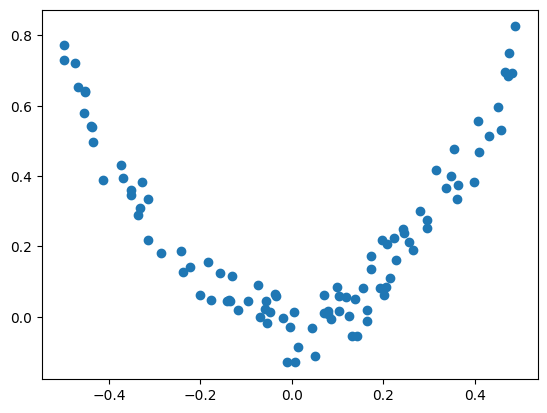

In [23]:
plt.scatter(df["X"], df["y"])
plt.show()

In [24]:
df["pred1"] = df["y"].mean()

In [25]:
df.head()

,X,y,pred1
0,-0.033964,0.059453,0.234503
1,-0.242140,0.185491,0.234503
2,0.296108,0.250834,0.234503
3,-0.074734,0.090368,0.234503
4,-0.221781,0.140088,0.234503


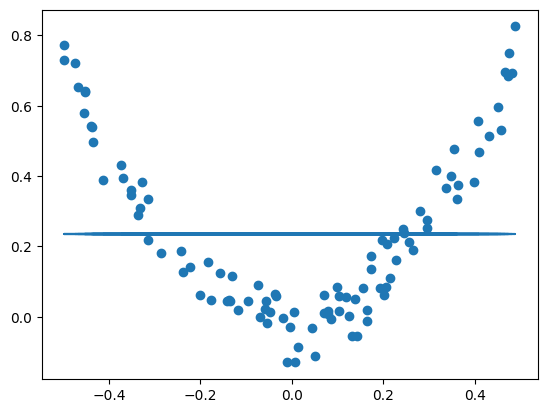

In [26]:
plt.scatter(df["X"], df["y"])
plt.plot(df["X"], df["pred1"])
plt.show()

In [27]:
df["res1"] = df["y"] - df["pred1"]

In [28]:
df.head()

,X,y,pred1,res1
0,-0.033964,0.059453,0.234503,-0.175051
1,-0.242140,0.185491,0.234503,-0.049012
2,0.296108,0.250834,0.234503,0.016331
3,-0.074734,0.090368,0.234503,-0.144135
4,-0.221781,0.140088,0.234503,-0.094416


In [35]:
from sklearn.tree import DecisionTreeRegressor
dtree = DecisionTreeRegressor(max_leaf_nodes=8)
dtree.fit(df["X"].values.reshape(100, 1), df["res1"].values)

,criterion,'squared_error'
,splitter,'best'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,None
,max_leaf_nodes,8
,min_impurity_decrease,0.0
,ccp_alpha,0.0


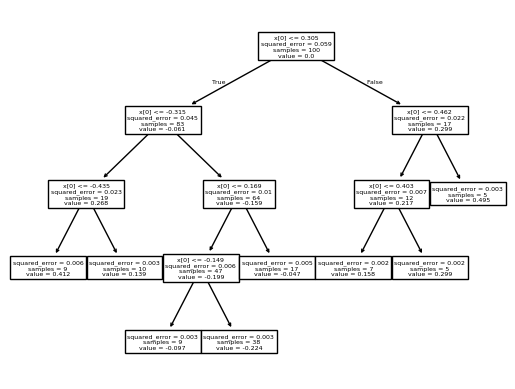

In [36]:
from sklearn.tree import plot_tree
plot_tree(dtree)
plt.show()

In [37]:
X_test = np.linspace(-0.5, 0.5, 500)

In [38]:
y_pred = 0.234503 + dtree.predict(X_test.reshape(500, 1))

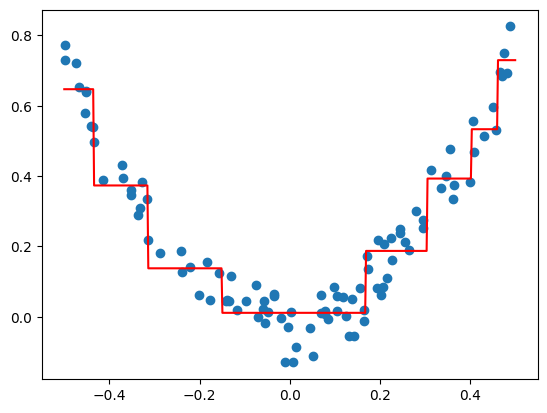

In [39]:
plt.plot(X_test, y_pred, color="red")
plt.scatter(df["X"], df["y"])

In [40]:
df["pred2"] = 0.234503 + dtree.predict(df["X"].values.reshape(100,1))
df.head()

,X,y,pred1,res1,pred2
0,-0.033964,0.059453,0.234503,-0.175051,0.010957
1,-0.242140,0.185491,0.234503,-0.049012,0.137566
2,0.296108,0.250834,0.234503,0.016331,0.187033
3,-0.074734,0.090368,0.234503,-0.144135,0.010957
4,-0.221781,0.140088,0.234503,-0.094416,0.137566


In [41]:
df["res2"] = df["y"] - df["pred2"]

In [42]:
df.head()

,X,y,pred1,res1,pred2,res2
0,-0.033964,0.059453,0.234503,-0.175051,0.010957,0.048496
1,-0.242140,0.185491,0.234503,-0.049012,0.137566,0.047925
2,0.296108,0.250834,0.234503,0.016331,0.187033,0.063801
3,-0.074734,0.090368,0.234503,-0.144135,0.010957,0.079412
4,-0.221781,0.140088,0.234503,-0.094416,0.137566,0.002521


In [44]:
dtree2 = DecisionTreeRegressor(max_leaf_nodes=8)
dtree2.fit(df["X"].values.reshape(100, 1), df["res2"].values)

,criterion,'squared_error'
,splitter,'best'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,None
,max_leaf_nodes,8
,min_impurity_decrease,0.0
,ccp_alpha,0.0


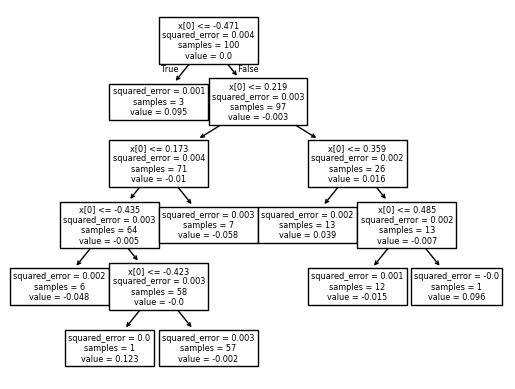

In [45]:
plot_tree(dtree2)
plt.show()

In [49]:
y_pred = 0.234503 + dtree.predict(X_test.reshape(500, 1)) + dtree2.predict(X_test.reshape(500, 1))

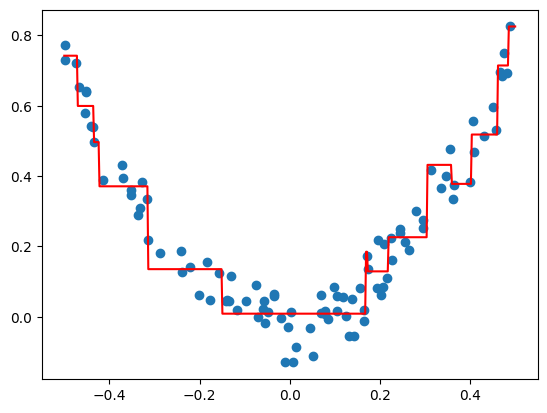

In [50]:
plt.plot(X_test, y_pred, color="red")
plt.scatter(df["X"], df["y"])

In [51]:
def gradientBoosting(X, y, number, lr, count=1, regs=[], foo=None):
    if number==0:
        return
    else:
        if count > 1:
            y = y - regs[-1].predict(X)
        else:
            foo = y

        tree_reg = DecisionTreeRegressor(max_depth=5)
        tree_reg.fit(X, y)

        regs.append(tree_reg)

        x1 = np.linspace(-0.5, 0.5, 500)
        y_pred = sum(lr * regressor.predict(x1.reshape(-1, 1)) for regressor in regs)

        plt.plot(x1, y_pred, linewidth=2)
        plt.plot(X[:, 0], foo, "r.")
        plt.show()

        gradientBoosting(X, y, number-1, lr, count+1, regs, foo=foo)

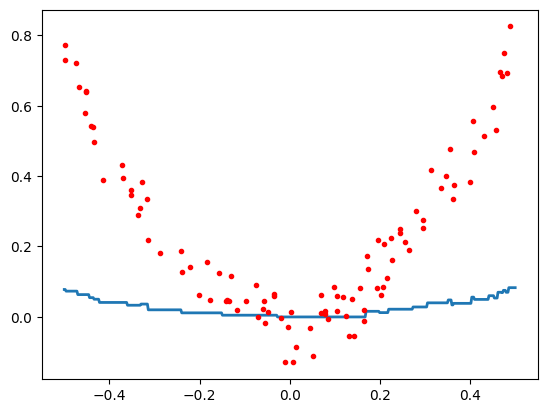

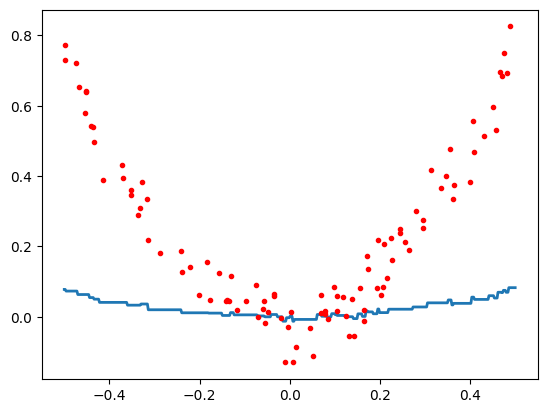

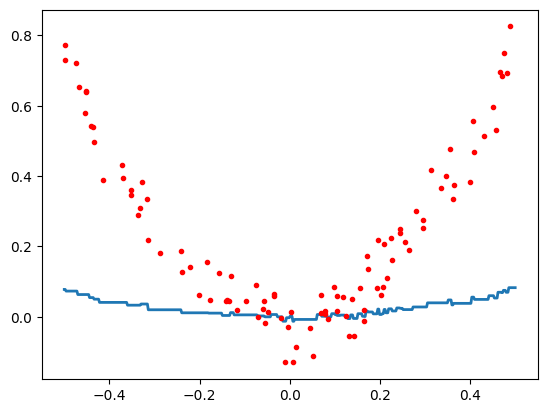

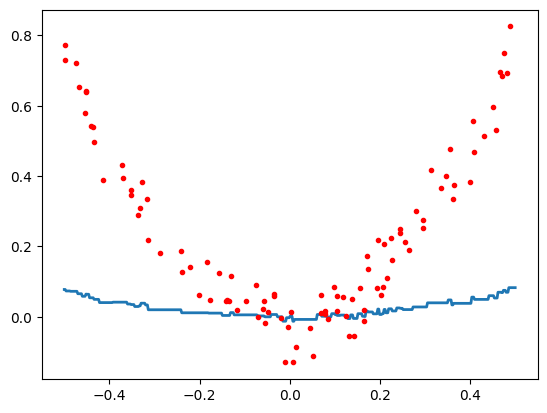

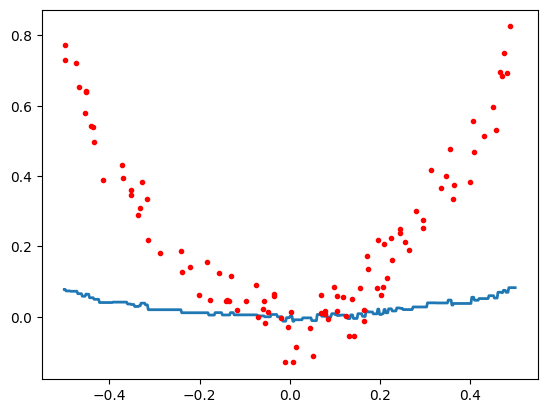

In [52]:
gradientBoosting(X, y, 5, lr=0.1)

## In Gradient Boosting
- Max Leaf Nodes are between 8-32
- And all models have same lr